<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 200px; display: inline" alt="IMT"/> </a>
</center>

# [Ateliers: Technologies des grosses data](https://github.com/wikistat/Ateliers-Big-Data)

# [Reconnaissance de caractères manuscrits](https://github.com/wikistat/Ateliers-Big-Data/2-MNIST) ([MNIST](http://yann.lecun.com/exdb/mnist/)) en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a>

## 1 Introduction

### 1.1 Objectif

Même traitement sur les mêmes données cette fois avec Python.

### 1.2 Lecture des données d'apprentissage et de test

In [2]:
# Graphiques dans la fenêtre
%matplotlib inline

/usr/local/Canopy_64bit/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

Les données peuvent être préalablement téléchargées ou directement lues. Ce sont celles originales du site [MNIST DataBase](http://yann.lecun.com/exdb/mnist/) mais préalablement converties au format .csv, certes plus volumineux mais plus facile à lire.

In [4]:
# Lecture des données d'apprentissage
path="" # Si les données osnt dans le répertoire courant sinon:
#path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
Dtrain=pd.read_csv(path+"mnist_train.csv",header=None)
Dtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [5]:
# Dimensions de l'échantillon
Dtrain.shape

(60000, 785)

In [6]:
# Extraction puis suppression de la dernière colonne des labels
Ltrain=Dtrain.iloc[:,784]
Dtrain.drop(Dtrain.columns[[784]], axis=1,inplace=True)
Dtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Même chose pour les données de test
Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
Ltest=Dtest.iloc[:,784]
Dtest.drop(Dtest.columns[[784]], axis=1,inplace=True)
Dtest.shape

(10000, 784)

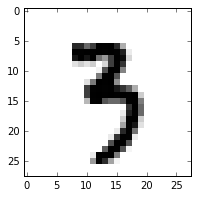

In [8]:
# affichage d'un chiffre
plt.figure(1, figsize=(3, 3))
plt.imshow(np.matrix(Dtest.iloc[1,:]).reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()


Ci-dessus on affiche le 2e chiffre de la matrice de test.
et son label correspondant

### 1.3 Exploration

Les données ont déjà été normalisées centrées et sont complètes. Elles ne nécessitent pas d'autre "nettoyage" au moins rudimentaire.

Le [tutoriel](http://wikistat.fr/pdf/st-tutor3-python-scikit.pdf) d'introduction à Scikit-learn montre comment représenter les images des caractères ainsi qu'une ACP qui n'est pas reprise ici. Quelles sont néanmoins les performances de k-means sur un tel volume ?

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
tps1 = time.clock()
km=KMeans(n_clusters=10,init='k-means++', 
   n_init=10, max_iter=100, tol=0.01,
   precompute_distances=True, verbose=0, 
   random_state=None, copy_x=True, n_jobs=1)
km.fit(Dtrain)
tps2 = time.clock()
print("Temps execution Kmeans :", (tps2 - tps1)/60)

('Temps execution Kmeans :', 6.617504116666666)


In [9]:
cm = confusion_matrix(Ltrain, km.labels_)
print(cm)

[[2497   17  162   21 2812  177   38    3   14  182]
 [   0    9    5 2977    0   10    6 3718    9    8]
 [  99 4193  329  351   11  158  173  362   70  212]
 [ 127  217 3919  106   15 1041  175  426   48   57]
 [  12   37    1  309   10   19 3189  159 1941  165]
 [ 275   14 1765  801   62 1487  377  166  353  121]
 [ 122   86   28  224   99   90   82  271    1 4915]
 [  14   39    5  283   15   10 1795  327 3773    4]
 [  32   54 1128  422   38 3461  193  297  179   47]
 [  19   13   84  117   37   69 2903  239 2460    8]]


Résultat sans grand intérêt mais qui montre la difficulté de regouper les caractères identiques à l'aide de la distance euclidienne usuelle; il y a beaucoup de confusion entre les classes.

## 2 Apprentissage et prévision du test

### 2.1 $K$ plus proches voisins

In [19]:
# Définition du modèle avec un nombre k "standard" de voisins
from sklearn.neighbors import KNeighborsClassifier
tps1 = time.clock()
knn = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
digit_knn=knn.fit(Dtrain, Ltrain) 
tps2 = time.clock()
print("Temps de k-nn :",(tps2 - tps1)/60)

('Temps de k-nn :', 0.4715463695693605)


In [20]:
# Apprentissage et estimation de l'erreur de prévision sur l'échantillon test
tps1 = time.clock()
erreur=1-digit_knn.score(Dtest,Ltest)
tps2 = time.clock()
print("Temps:",(tps2 - tps1)/60,"Erreur:",erreur)

('Temps:', 5.1795979412518784, 'Erreur:', 0.036699999999999955)


In [ ]:
## Application pour la validation croisée


Il faudrait ré-appliquer la procédure d'otpimisation de $k$ par validation croisée décrite dans le [tutoriel](http://wikistat.fr/pdf/st-tutor3-python-scikit.pdf) d'introduction à scikit-learn. Nanmoins la solution $k=10$ est raisonnable et on retrouve une performance classique sur ce type de données: 3.3%, pour une méthode utilisée sans raffinement. 

C'est en effet une autre distance qu'il faudrait utiliser avec les $k$ plus proches voisins pour améliorer sensiblement les résultats mais avec un coût beaucoup plus élevé en temps de calcul. Un autre [scénario](http://wikistat.fr/pdf/st-atelier-MINST-tangent-ditance.pdf) propose ainsi le calcul d'une distance tangentielle entre les images ([Simard et al. (1998)](https://hal-ens.archives-ouvertes.fr/file/index/docid/60948/filename/Tangent_distance.pdf)). Le programme Matlab fait appel à un programme en C. L'intégration dans du code python plutôt que Matlab resterait à faire...

### 2.2  Random forest

Les forêts aléatoires sont également une approche raisonnable, à moindre coût de développement, sur ces données. Analyser en détail la liste des paramètres proposés dans l'implémentation de cet algorithme. Consulter pour ce faire la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) en ligne.

Les valeurs par défaut des paramètres sont utilisées sauf pour le nombre d'arbres: 100 au lieu de 10, et le nombre de processeurs utilisés: -1 au lieu de 1 (tous sont utilisés saus 1 pour le système). Attention, tous les paramètres disponibles ne sont pas listés.

In [21]:
from sklearn.ensemble import RandomForestClassifier
tps0 = time.clock()
rf = RandomForestClassifier(n_estimators=100, 
   criterion='gini', max_depth=None, min_samples_split=2, 
   min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
   bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
rf.fit(Dtrain,Ltrain)
tps1 = time.clock()
print("Temps de configutration RF :" ,tps1 - tps0)

('Temps de configutration RF :', 30.200642213106676)


In [22]:
# erreur out-of-bag
erreur_oob=1-rf.oob_score_
tps2 = time.clock()
print("Temps execution RF :", tps2 - tps0, "Erreur oob:", erreur_oob)


('Temps execution RF :', 30.211336546769417, 'Erreur oob:', 0.034716666666666618)


In [23]:
# erreur sur l'échantillon test
1-rf.score(Dtest,Ltest)

0.029399999999999982

In [24]:
cm = confusion_matrix(Ltest, rf.predict(Dtest))
print(cm)

[[ 971    0    0    0    0    2    2    1    4    0]
 [   0 1124    2    2    0    1    4    0    1    1]
 [   6    0 1000    4    1    0    4   10    7    0]
 [   0    0   10  973    0    7    0    9    9    2]
 [   1    0    1    0  956    0    4    0    3   17]
 [   3    1    0    9    2  863    6    2    5    1]
 [   7    3    0    0    4    4  936    0    4    0]
 [   1    3   19    3    2    0    0  986    1   13]
 [   2    0    5    7    2    6    3    4  937    8]
 [   6    5    1   10   11    3    1    5    7  960]]


Comme pour les $k$ plus proches voisins, il serait utile d'optimiser certains paramètres dont le nombre d'arbres et sans doute *max_features*. L'optimisation de l'erreur *out-of-bag* plutôt qu'une procédure lourde  de validaiton croisée serait bienvenue. D'autre part, la restriction de la profondeur max des arbres pourrait réduire sensiblement les temps de calcul mais cela ne semble pas nécessaire d'autant que c'est un paramètre critique pour la qualité de la prévision.


## 3 Effet de la taille l'échantillon d'apprentissage

Le taux d'erreur de 3% obtenu sans effort d'optimisation est tout à fait correct au regard du temps passé en développement ! Plutôt que de chercher à l'optimiser, la suite du travail s'intéresse à l'effet de la taille de cet échantillon d'apprentissage sur la précision. La fonction [*learning_curve*](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html#sklearn.learning_curve) réalise ce calcul mais ne permet pas d'extraire le temps d'excution pour chaque taille. Une procédure rudimentaire est mise en oeuvre.

### 3.1 Avec Random Forest (Scikit-learn) et 100 arbres

In [ ]:
from sklearn.cross_validation  import train_test_split
# tailles croissantes de l'échantillon d'apprentissage
arrayErreur=np.empty((12,3))
nArbres=100
for i in range(1,13):
    n=5000*i
    arrayErreur[i-1,0]=n
    if i==12:
        n=59999
    Xtrain,Xdrop,ytrain,ydrop=train_test_split(Dtrain,Ltrain,train_size=n)
    tps1 = time.clock()
    rf = RandomForestClassifier(n_estimators=nArbres, 
       criterion='gini', max_depth=None, min_samples_split=2, 
       min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
       bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
    rf.fit(Xtrain,ytrain)
    tps2=time.clock()
    arrayErreur[i-1,2]=1-rf.score(Dtest,Ltest)
    arrayErreur[i-1,1]=tps2 - tps1
dataframeErreur1=pd.DataFrame(arrayErreur,columns=["Taille","Temps","Erreur"])
print(dataframeErreur1)

In [ ]:
# Graphes superposés
from __future__ import division
from scipy import *
from pylab import *

x = linspace(5,60,12)     
fig = plt.figure()
# premier graphe
ax1 = fig.add_subplot(111)
ax1.plot(x,dataframeErreur1["Temps"] , '-b', label=ur"Temps",lw=1.5)
# absisses communes
xlim(0,65)
xlabel(ur"Taille échantillon x 1000", color='b', fontsize=16)
ylim(0, 70)                                                   
ylabel(ur"Secondes", color='b', fontsize=16)  
legend(loc=2)                                                  
# 2ème graphe
ax2 = ax1.twinx()                                              
ax2.plot(x,dataframeErreur1["Erreur"] ,'--g', label=ur"Erreur",lw=1.5)       
ylim(0, 0.1)                                                  
ylabel(ur"Taux d'erreur", color='g', fontsize=16)          
legend(loc=1)                                                   
show()

### 3.2 Avec Random Forest (Scikit-learn) et 250 arbres

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation  import train_test_split
# tailles croissantes de l'échantillon d'apprentissage
arrayErreur=np.empty((12,3))
nArbres=250
for i in range(1,13):
    n=5000*i
    arrayErreur[i-1,0]=n
    if i==12:
        n=59999
    Xtrain,Xdrop,ytrain,ydrop=train_test_split(Dtrain,Ltrain,train_size=n)
    tps1 = time.clock()
    rf = RandomForestClassifier(n_estimators=nArbres, 
       criterion='gini', max_depth=None, min_samples_split=2, 
       min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
       bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
    rf.fit(Xtrain,ytrain)
    tps2=time.clock()
    arrayErreur[i-1,2]=1-rf.score(Dtest,Ltest)
    arrayErreur[i-1,1]=tps2 - tps1
dataframeErreur=pd.DataFrame(arrayErreur,columns=["Taille","Temps","Erreur"])
print(dataframeErreur)

In [ ]:
# Graphes supersosés
from __future__ import division
from scipy import *
from pylab import *

x = linspace(5,60,12)     
fig = plt.figure()
# premier graphe
ax1 = fig.add_subplot(111)
ax1.plot(x,dataframeErreur["Temps"] , '-b', label=ur"Temps",lw=1.5,marker=".",markersize=6)
# absisses communes
xlim(0,65)
xlabel(ur"Taille échantillon x1000", fontsize=15)
ylim(0, 100)                                                   
ylabel(ur"Temps (s)", color='b', fontsize=15)  
legend(loc=2)                                                  
# 2ème graphe
ax2 = ax1.twinx()                                              
ax2.plot(x,dataframeErreur["Erreur"] ,'--',color='black', label=ur"Erreur",lw=1.5,marker=".",markersize=6)       
ylim(0, 0.1)                                                  
ylabel(ur"Erreur (%)",  fontsize=15)          
legend(loc=1)                                                   
show()

Comparer les résultats obtenus (temps, précision) avec R.

## Réseau de neurones

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
#param_grid=[{"hidden_layer_sizes":list([(5,),(10,)])}] ### test de nombres de neurones
#nnet= GridSearchCV(MLPClassifier(max_iter=200),param_grid,cv=5,n_jobs=-1)
#nnetOpt=nnet.fit(Dtrain,Ltrain)
# paramètre optimal
#print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))
nnet=MLPClassifier(max_iter=200,hidden_layer_sizes=(100,))
nnetOpt=nnet.fit(Dtrain,Ltrain)


ImportError: cannot import name MLPClassifier

In [39]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(Dtest,Ltest)

0.040799999999999947

In [40]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(Dtest)
# matrice de confusion
table=pd.crosstab(y_chap,Ltest)
print(table)

784      0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      965     0    3    0    0    3    6    0    3    3
1        1  1118    1    0    1    3    3    3    1    2
2        0     4  993    4    5    0    2   27   15    2
3        1     3   10  983    1   24    0   10   25   11
4        1     1    4    1  937    3    8    1    5   15
5        0     0    1    5    0  836    8    0    4    0
6        4     2    3    2    5    9  927    0    7    0
7        1     1   10    5    9    2    0  979    5   12
8        3     6    4    6    4    8    4    2  904   14
9        4     0    3    4   20    4    0    6    5  950


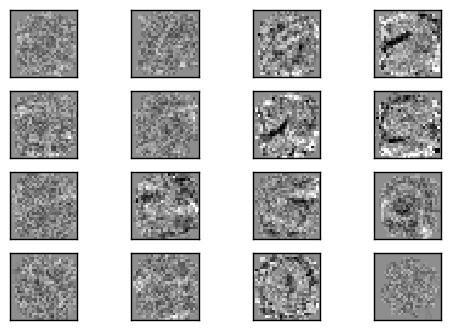

In [41]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = nnet.coefs_[0].min(), nnet.coefs_[0].max()
for coef, ax in zip(nnet.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

## Visualiser les poids des perceptrons

In [51]:
print nnet.out_activation_

softmax
